In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(X_train,Y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

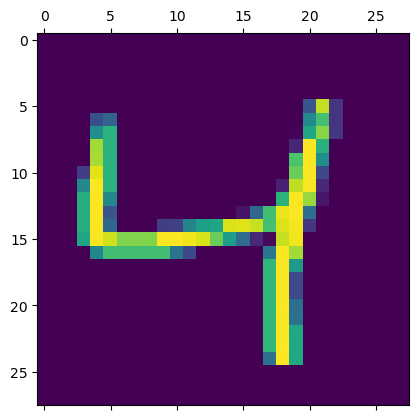

In [36]:
plt.matshow(X_train[2])

In [37]:
y_train[2]

4

In [38]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [39]:
X_train.shape

(60000, 28, 28)

In [52]:
X_train = X_train/255
X_test = X_test/255

In [53]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [54]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,) , activation='sigmoid')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4678 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9254


In [57]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 4s 5ms/step - loss: 0.2663 - accuracy: 0.9254


[0.266252726316452, 0.9254000186920166]

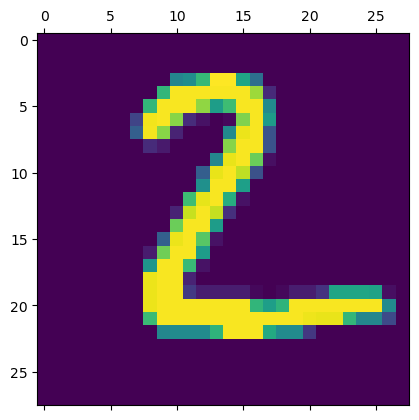

In [63]:
plt.matshow(X_test[1])

In [61]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([3.7846372e-02, 4.5979110e-07, 5.0206631e-02, 9.5010149e-01,
       2.1356440e-03, 1.3709603e-01, 2.0762388e-06, 9.9982262e-01,
       8.2724348e-02, 6.3769341e-01], dtype=float32)

In [70]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [71]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [65]:
np.argmax(y_pred[1])

2

In [73]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,    9,  919,   17,    8,    4,   13,   12,   39,    3],
       [   4,    0,   18,  918,    0,   27,    2,   14,   21,    6],
       [   1,    1,    3,    1,  912,    0,   15,    5,   10,   34],
       [  10,    2,    3,   29,    7,  787,   14,    7,   27,    6],
       [  11,    3,    6,    1,    7,   13,  914,    2,    1,    0],
       [   1,    6,   20,    7,    4,    0,    0,  958,    2,   30],
       [   7,    9,    6,   23,    9,   31,    9,   13,  861,    6],
       [  11,    7,    1,   10,   29,   10,    0,   33,    4,  904]])>

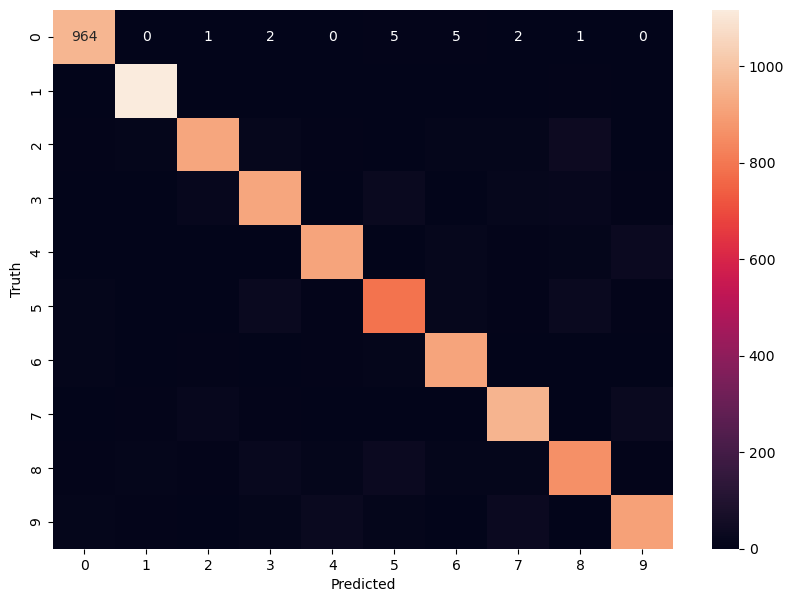

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7) )
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss = 'mean_squared_error',
    metrics=['accuracy'])

In [96]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 20.2774 - accuracy: 0.0994
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 20.2774 - accuracy: 0.0990
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 20.2774 - accuracy: 0.0989
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2774 - accuracy: 0.0989
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 20.2774 - accuracy: 0.0990
